In [1]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import *

In [2]:
d=pd.read_csv('train_data.csv')

In [3]:
print(d)

       r  tmin  tmax   hmin   hmax  wmin  wmax  date  month
0    0.0   9.8  28.6  18.60   73.2   0.0   8.1     1      1
1    0.0  14.5  29.7  18.50   63.4   0.0   5.2     2      1
2    0.0  12.3  30.1  25.10   83.2   0.0   9.1     3      1
3    0.0  13.9  31.8  21.60   83.1   0.0   7.1     4      1
4    0.0  15.1  30.7  32.30   89.0   0.0   0.1     5      1
..   ...   ...   ...    ...    ...   ...   ...   ...    ...
339  0.0  19.6  27.2  74.20  100.0   0.0  11.0    27     12
340  0.0  18.9  28.3  74.60   95.4   0.0  10.5    28     12
341  0.0  16.9  27.1  72.40   88.0   0.0  10.5    29     12
342  0.0  16.0  27.0  69.75   98.6   0.0   8.6    30     12
343  0.0  19.9  26.5  61.80   94.4   0.0  10.9    31     12

[344 rows x 9 columns]


In [4]:
d['r']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
339    0.0
340    0.0
341    0.0
342    0.0
343    0.0
Name: r, Length: 344, dtype: float64

### TRAINING

In [5]:
x1=[]
y1=[]
t1=[]
for i in range(2,344):
    x1.append([d['r'][i-2], d['tmin'][i-2], d['tmax'][i-2], d['hmin'][i-2], d['hmax'][i-2], d['wmin'][i-2], d['wmax'][i-2],
             d['r'][i-1], d['tmin'][i-1], d['tmax'][i-1], d['hmin'][i-1], d['hmax'][i-1], d['wmin'][i-1], d['wmax'][i-1],
              d['hmax'][i-2]-d['hmax'][i-1],
               d['hmin'][i-2]-d['hmin'][i-1],
              d['tmax'][i-2]-d['tmax'][i-1],
               d['tmin'][i-2]-d['tmin'][i-1],
               
               
              d['date'][i],d['month'][i],2019])
    y1.append(d['r'][i])
    t1.append(i)

In [11]:
reg=RandomForestRegressor(max_depth=19,random_state=243,max_features='log2',oob_score=True,n_estimators=160,
                          )
reg.fit(x1,y1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=19, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=True,
                      random_state=243, verbose=0, warm_start=False)

In [12]:
yp=[]
s=0
q=0
for i in x1:
    yp.append(reg.predict([i]))
    s=y1[q]-reg.predict([i])
    q=q+1

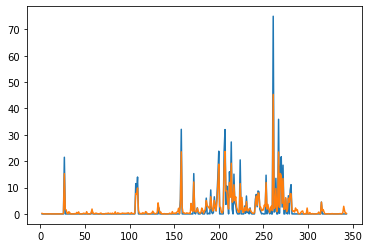

In [13]:
plt.plot(t1,y1)
plt.plot(t1,yp)

In [14]:
print('train data score is: ',reg.score(x1,y1))
print('the mean absolute training  error is : ',mean_absolute_error(y1,yp))

train data score is:  0.8571617001356227
the mean absolute training  error is :  1.0298625430368848


In [15]:
d1=pd.read_csv('val_data.csv')
d=d1

In [16]:
xv=[]
yv=[]
tv=[]
for i in range(3,140):
    xv.append([d['r'][i-2], d['tmin'][i-2], d['tmax'][i-2], d['hmin'][i-2], d['hmax'][i-2], d['wmin'][i-2], d['wmax'][i-2],
             d['r'][i-1], d['tmin'][i-1], d['tmax'][i-1], d['hmin'][i-1], d['hmax'][i-1], d['wmin'][i-1], d['wmax'][i-1],
              d['hmax'][i-2]-d['hmax'][i-1],
               d['hmin'][i-2]-d['hmin'][i-1],
              d['tmax'][i-2]-d['tmax'][i-1],
               d['tmin'][i-2]-d['tmin'][i-1],
               
               
              d['date'][i],d['month'][i],2019])
    yv.append(d['r'][i])
    tv.append(i)

In [17]:
ypv=[]
for i in xv:
    ypv.append(reg.predict([i]))

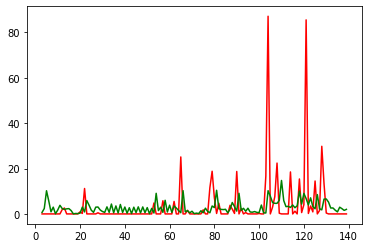

In [18]:
plt.plot(tv,yv,color='red')
plt.plot(tv,ypv,color='green')

In [19]:
print('test data score is: ',reg.score(xv,yv))
print('the mean absolute test  error is : ',mean_absolute_error(yv,ypv))

test data score is:  0.052343928319775745
the mean absolute test  error is :  4.829886659872973
